### Plate capacitors in Parallel
This task involves investigating the potential and electric field for a setup with two
plate capacitors placed in parallel in a grounded box (see figure 1 below). The capacitors
are held at constant potential $V = −1$ (left capacitor) and $V = +1$ (right capacitor), and are separated by a distance $d$. We assume that the thickness of the capacitors is
negligible, and that they extend from $y = −0.5$ to $y = 0.5$. To find the potential, and
thus being able to determine the electric field, one must solve Laplace's equation inside the box
with the given conditions.

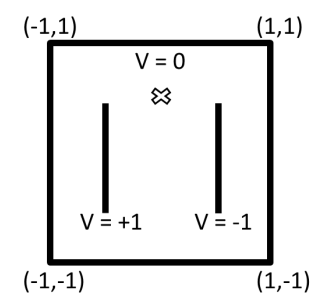

Figure 1: Illustration of the setup. The coordinates of the square border are marked
regarding center in the box. The cross symbol represents the observation point used last
partial assignment.

Solve Laplace's solution for distance 0.5m

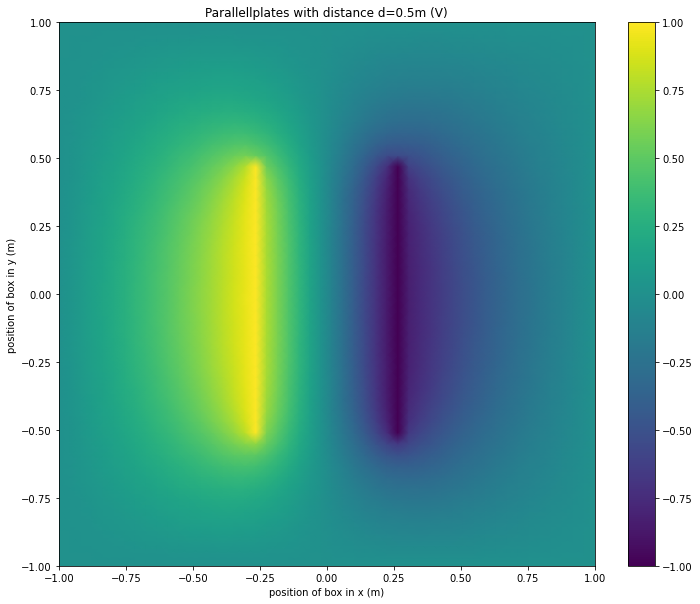

In [1]:
#Importing libraries
import matplotlib.pyplot as plt
import time
from numpy import meshgrid, linspace, zeros, linalg, gradient, copy, arange

#Parameters
L = 1
d = 0.5
N = 50
tol = 0.01

#Analytical solution
def V(x, y):
    return (1 - x / L)

#Initializing 2-D meshgrid
x_space = linspace(-1, 1, N)
y_space = linspace(-1, 1, N)
xv, yv = meshgrid(x_space, y_space)
v = V(xv, yv)

#Using Gauss-Seidel method
def Gauss_step(V_k, N):
    for i in range(N):
        for j in range(N):
            if (j == 0) or (j == (N-1)) or (i == 0) or (i == (N-1)): 
                V_k[i, j] = V_k[i, j]
                    
            else:
                V_k[i, j] = (1/4) * (V_k[(i-1) % N, j] + V_k[(i+1) % N, j] + V_k[i, (j-1)] + V_k[i, (j+1)])
                
    return V_k


def Gauss_Seidel(V_field, V, N, tol):
    V_k = Gauss_step(V_field, N)
    V_k_copy = copy(V_k)
    V_k_new = Gauss_step(V_k_copy, N)
        
    while linalg.norm(V_k - V_k_new) > tol:
        V_k = copy(V_k_new)
        V_k_copy = copy(V_k)
        V_k_new = Gauss_step(V_k_copy, N)
        
        #update plate position
        V_k_new[ int((N/4)):int((N*(3/4))) , int((N/2)-(N*d/4)) ] = 1 
        V_k_new[ int((N/4)):int((N*(3/4))) , int((N/2)+(N*d/4)) ] = -1
    
    return V_k_new


V_field = zeros((N, N))

V_field[ int((N/4)):int((N*(3/4))) , int((N/2)-(N*d/4)) ] = 1  # Finding potential for the left plate
V_field[ int((N/4)):int((N*(3/4))) , int((N/2)+(N*d/4)) ] = -1 # Finding potential for the right plate

V_k_field = Gauss_Seidel(V_field, v, N, tol)

fig, ax = plt.subplots()
mesh = ax.pcolormesh(xv, yv, V_k_field, shading='gouraud')
mesh.figure.set_size_inches(12, 10)
fig.colorbar(mesh, ax=ax)

plt.title(f'Parallellplates with distance d=0.5m (V)')
plt.xlabel('position of box in x (m)')
plt.ylabel('position of box in y (m)')
plt.show()

We find the electric field and plot it with quiverplot for a vectorfield representation

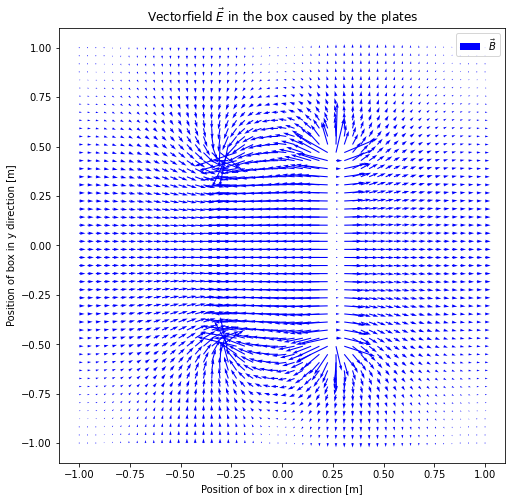

In [2]:
#Using np.gradient to get the field curl
y, x = gradient(V_k_field)
fig, ax = plt.subplots()

plt.title(r'Vectorfield $\vecE$ in the box caused by the plates')
plt.xlabel('Position of box in x direction [m]')
plt.ylabel('Position of box in y direction [m]')

q = ax.quiver(xv, yv , x, y, color='b', label=r'$\vecB$', scale=3)
q.figure.set_size_inches(8, 8)

plt.legend()
plt.show()

Below we have the electric field in the point (0, 0.6) as a function of plate seperation $d$.

<Figure size 432x288 with 0 Axes>

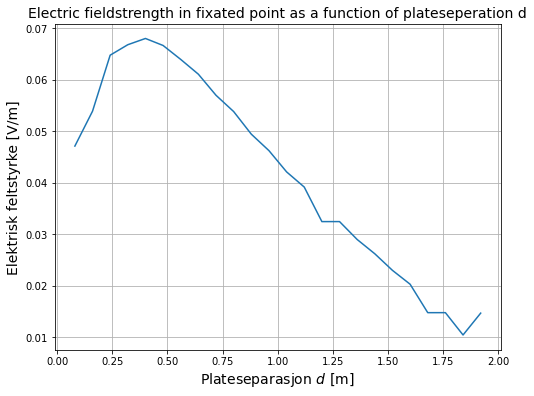

In [3]:
#Initializing lists
N = 25
E_point_list = zeros(N-1)
index_list = arange(N-1)
d_list = arange(2/N, 2, 2/N)

#x and y coordinates
y_coord = int((N/2) + ((N/2)*0.6))
x_coord = int(N/2)                  

#Filling the list
for i, d in zip(index_list, d_list):
    y_vec, x_vec = gradient(Gauss_Seidel(V_field, v, N, tol))
    E_point_list[i] = linalg.norm((x_vec[y_coord, x_coord], y_vec[y_coord, x_coord]))
    
#Plotting stuff  
plt.figure(0)
plt.figure(figsize=(8,6))
plt.plot(d_list, E_point_list)
plt.title('Electric fieldstrength in fixated point as a function of plateseperation d', fontsize=14)
plt.xlabel('Plateseperation $d$ [m]', fontsize=14)
plt.ylabel('Electric fieldstrength [V/m]', fontsize=14)
plt.grid()
plt.show()